# L6 Derived Random Variables, Transforms, Limit theorems

## L6.1 Derived random variables

How do we find the distribution of $Y = X^2$ if we know the distribution of $X$? In many simple situations, we can simply use the following

$$F_Y(y) = P(Y \le y) = P(X^2 \le y) = P(-\sqrt{y} \le X \le \sqrt{y}) = F_X(\sqrt{y}) - F_X(-\sqrt{y})$$

Using Monte Carlo is usually very simple and more straight forward than calculating inverse functions for different periods.

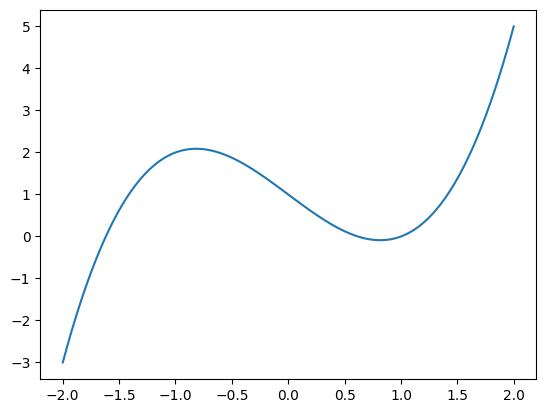

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(-2,2,100)
y = x**3-2*x+1

plt.plot(x,y)
plt.show()

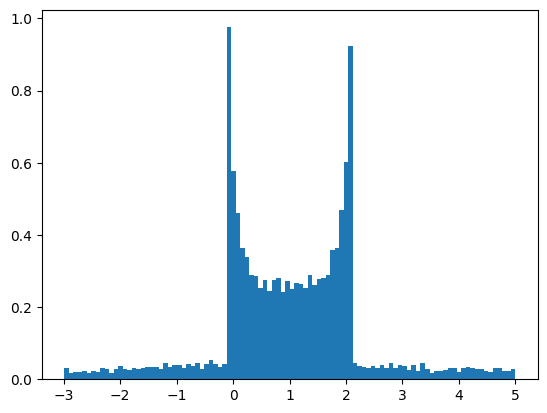

In [16]:
N = 10000
x = np.random.uniform(-2,2,N)
y = x**3-2*x+1
plt.hist(y, density=True, bins = 100)
plt.show()


This is what is done when we look at, e.g., portfolio risk, insurance risk, etc. where we may be dealing with several random variables, each with their own distribution. We will see example of that when we look at options in the second part of the course, which are nonlinear functions of the underlying sharesprice.

## L6.2 Transforms

Transforms are not very intuitive but they are a very useful theoretical tool. A **Moment** is defined as $E[X^n]$ and we know the main ones: $\mu = E[X]$, and $E[X^2]$ is needed for the variance. The third moment $E[X^3]$ is related to the **skewness** of a distribution, $E \left[\left(\frac {X-\mu }{\sigma }\right)^{3}\right]$, which measures deviations from symmetry (skewed to the left means that there is more probability mass to the right of the mean, or that the distribution tails off to the left). Symmetric distributions have skewness = 0. The fourth moment $E[X^4]$ is related to **kurtosis**, $E \left[\left(\frac {X-\mu }{\sigma }\right)^{4}\right]$, which measures the heaviness of the tails. The normal distribution is the typical reference point, but its kurtoisis is 3, and people often subtract 3 from the kurtosis to measure the excessive kurtoisis (beyond normal).

The **moment generating function** of a random variable is defined as the function

$$M(s) = E[e^{sX}]$$

This is also called the Laplace Transform and can be very useful when solving differential equations - informaly, it turns differentiation into multiplication and the other way around. As we will see, we only need it to exist for $s$ in a neighborhood of 0, but the drawback of the Laplace Transform is that it doesn't always exist. A better transform, one that always exists, is the Fourier Transform, but that puts us into Complex Anaysis so we'll stick to the Laplace Transform. 

For a discrete random variable, the moment generating function is

$$M(s) = \sum_{i=1}^{\infty}{e^{sx_i}p_X(x_i)}$$

and for continuous random variables,

$$M(s) = \int_{-\infty}^{\infty}{e^{sx}f_X(x)dx}$$


### Example Find the moment generating function of the Poisson distribution and the Exponential distribution (D230)

The following may sometimes be useful. If $Y = aX+b$, then:

$$M_Y(s) = E[e^{s(aX+b)}] = e^{sb}E[e^{saX}] = e^{sb}M_X(sa)$$

Moment generating functions are useful to generate moments - a big reason to use these things in the first place (another reason is that if one can see that two random variables have the same moment generating function, then they have the same distribution).

Note the following:

$$\frac{d}{ds}M_X(s) = \frac{d}{ds}E[e^{sX}] = E[\frac{d}{ds}e^{sX}] = E[Xe^{sX}]$$

If we plug in $s=0$, we simply get $E[X]$. Hence, if we create the moment generating function, $M_X(s)$ and differentiate that function with respect to $s$, evaluate the derivative at $s=0$, we get the mean of $X$. This is often much simpler than computing the mean directly.

We can then repeat this process to get

$$\frac{d^n}{ds^n}M_X(s) = \frac{d^n}{ds^n}E[e^{sX}] = E[\frac{d^n}{ds^n}e^{sX}] = E[X^ne^{sX}]$$

Thus, if we plug in $s=0$ we get $E[X^n]$ for any $n$ and we can generate any number of moments we want.

As mentioned earlier, we have the following theorem:

#### Inversion Theorem 
The transformation $M_X(s)$ uniquely determines the CDF of $X$, provided $M_X(s)$ is finite in some interval around s=0

Another useful application of moment generating functions is properties of sums of independent random variables.

Suppose $X_1$ and $X_2$ are independent, and $Y = X_1 + X_2$ then

$$M_Y(s) = M_{X_1}(s)M_{X_2}(s)$$

More generally, if $Y = X_1 + X_2 + ... + X_n$ where the $X_i$ are independent, then

$$M_Y(s) = M_{X_1}(s)M_{X_2}(s) ...  M_{X_n}(s)$$

This allows us to find the distributions and moment generating functions of sums of random variables (e.g., recall that binomial is a sum of Bernoullis).

Suppose $X$ and $Y$ are independent normal random variables. It can be shown that the moment generating function of a normal random variable is 


$$M_X(s) = e^{(\sigma^2s^2/2) + \mu s}$$

Let's show that the sum $X+Y$ is still normal. The same is true for Poisson random variables.

## L6.3 Laws of Large Numbers

These laws are a bit theoretical, but they are good to know. There are two laws, the weak and strong laws, but they both say more or less the same, i.e., that the sample mean of a large number of iid random variables is very close to the mean itself with high probability.

In both cases, we are dealing with iid random variables $X_1$, $X_2$, ... with mean $\mu$ (this also says that they actually have a mean)
Technically, the **weak law** states:

$$P\left(\left|\frac{X_1 + X_2 + ... + X_n}{n}-\mu \right| \ge \epsilon \right) \rightarrow 0$$

as $ n\rightarrow \infty$

and the **strong law** states that

$$P\left(\lim_{n \to \infty} \frac{X_1 + X_2 + ... + X_n}{n} = \mu \right) = 1$$

The difference lies in the type of convergence (convergence in probability and almost surely convergence also called convergence with probability ). We will not use these extensively, but it is interesting to carry out some Monte Carlo simulations.

Let's look at a binomial(10,0.4). The mean is 4, so the sample mean should approximate the mean as n increases (distribution around it should become tighther and tighter). We will see in the next section that the distributions are approximately normal.

Working on  100
Working on  1000
Working on  10000


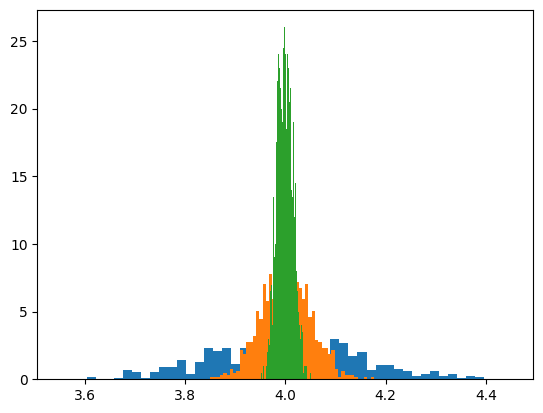

In [20]:
#Laws of large numbers
import numpy as np

#fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

n=10
p=0.4

N = 1000
M = [100,1000, 10000]

for i,m in enumerate(M): #For samples means of size m
    print('Working on ',m)
    samples = []
    for j in range(N): #Generate N samples of the sample mean of size m
        s = np.random.binomial(n, p, m)
        samples.append(sum(s)/m)
    #axs[i].hist(samples,density=True, bins = 50)
    plt.hist(samples,density=True, bins = 50)
plt.show()

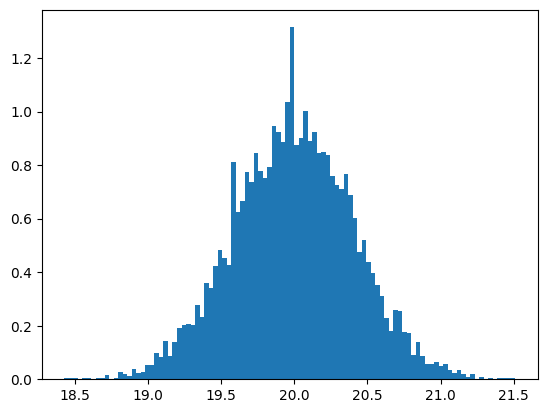

In [56]:
nn = 100
samples = []

for i in range(10000):
    s = np.random.binomial(120, 1/6, nn)
    samples.append(sum(s)/nn)
plt.hist(samples, density=True, bins = 100)
plt.show()

mean = 4.499085772056802
var  = 0.010034605678314329
std  = 0.10017287895590467


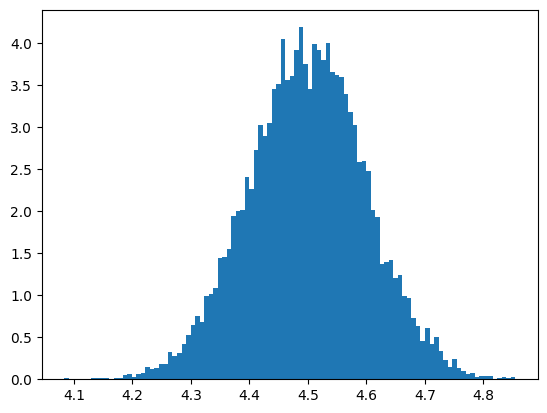

In [70]:
nn = 1000
samples = []

for i in range(10000):
    s = np.random.uniform(-1, 10, nn)
    samples.append(sum(s)/nn)
    
samples = np.array(samples)

print(f"mean = {np.mean(samples)}")
print(f"var  = {np.var(samples)}")
print(f"std  = {np.std(samples)}")

plt.hist(samples, density=True, bins = 100)
plt.show()

## L6.4 The Central Limit Theorem

The Central Limit Theorem explains the imporance of the normal distribution. It says, essentially, that the sum of iid random variables $X_1, X_2, ...$,  $S_n = X_1 + X_2 + ... + X_n$ is approximately normally distributed as $n$ increases. 

The mean of the $S_n$ is simply $n\mu$ and its variance is $\text{var}(S_n) = n\text{var}(X)$, and thus the standard deviation is $\sigma\sqrt{n}$. If we convert the $S_n$ to its $Z$ score, we get the variable

$$Z_n = \frac{S_n-n\mu}{\sigma\sqrt{n}}$$

This is precisely the variable in the **Central Limit Theorem**:

Let $X_1, X_2, ...$ be a sequence of independent identically distributed random variables with mean $\mu$ and variance $\sigma^2$, and define

$$Z_n = \frac{S_n - n\mu}{\sigma\sqrt{n}}$$

Then, the CDF of $Z_n$ converges to the standard normal CDF:

$$\Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x{e^{-x^2/2}}$$

in the sense that

$$\lim_{n \to \infty} P(Z_n \le z) = \Phi(z)$$


The CLT is very general and applies is great many practical situations. It says that in many situations, the sum of iid random variables is approximately normal - it applies in many situations where the random effects are a sum of large number of small independent factors (they dont have to be identically distributed in all cases, there are versions of the CLT that remove the identically distributed part, but add some other constraints). The CLT often eliminates the need for detailed probabilitic models with manipulations of pmfs and pdfs (not always though...), and the calculations only depend on means and standard deviations.

Here is the general procedure for using the CLT:

Let $S_n = X_1 + X_2 + ... + X_n$ where $X_1, X_2, ...$ are iid with mean $\mu$ and variance $\sigma^2$. If $n$ is large, the probability $P(S_n \le c)$ can be approximated by treating $S_n$ as if it were normal, according to the following procedure:


1. Calculate the mean $n\mu$ and variance $n\sigma^2$ of $S_n$
2. Calculate the Z score of c: $z = (c-n\mu)/\sigma\sqrt{n}$
3. Approximate $P(S_n \le c) \approx \Phi(z)$


Couple of examples:

A plane has been loaded with 100 packages whose weight are indepedent random variables that are uniformly distributed between 5 and 50 kg. What is the proability that the total weight will exceed 3000kg?
This is not so simple using theory, but we can go though our steps:

1. Mean is $100*(5+50)/2 = 2750$, and the variance is $100*(50-5)^2/12 = 16875$
2. Z score of 3000 is thus: $(3000-2750)/\sqrt(16875) = 1.92$
3. The approximate value for $P(S_n \le 3000)$ is $\Phi(1.92) = 0.9726$

The answer is thus $P(S_n > 3000) = 1- P(S_n \le 3000) \approx = 1 - 0.9726 = 0.0274$

Let's check using Monte Carlo...

Estimated probability over 3000:  0.0242


(array([1.40036647e-05, 8.70227732e-05, 5.92154962e-04, 1.76546201e-03,
        2.86474968e-03, 2.66869838e-03, 1.49639159e-03, 4.36114128e-04,
        6.90180615e-05, 9.00235585e-06]),
 array([2258.19881368, 2358.17264446, 2458.14647523, 2558.12030601,
        2658.09413678, 2758.06796756, 2858.04179833, 2958.01562911,
        3057.98945988, 3157.96329066, 3257.93712143]),
 <BarContainer object of 10 artists>)

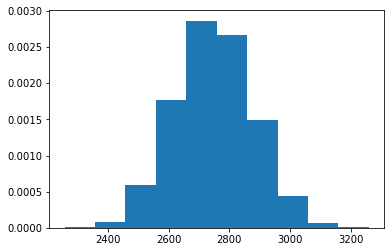

In [16]:
n = 100 #Number of packages
N = 10000 #Number of simulations

samples = []
for i in range(N):
    x = np.random.uniform(5,50,n)
    sn = sum(x)
    samples.append(sn)

samples = np.array(samples) #So we can filter it
print("Estimated probability over 3000: ",len(samples[samples>3000])/N)

plt.hist(samples,density=True)

Here is a very practical example on polling. We poll 1000 voters and record the fraction that votes for a particular party. Suppose 175 people say that they will vote for the party. We want to create a 90% confidence interval around this fraction. Now, we model each individual as a Bernoulli variable where 1 represents a vote to the party and 0 that the person does not vote for the party. The Bernoulli variable has a paramter $p$, and due to our new found knowledge of the law of large numbers, we assume that $p=175/100 = 0.175$ is a reasonably close estimate of the parameter of interest.

The sample mean is the random variable of interest, i.e., $M_n = S_n/n$ where $S_n = X_1 + X_2 + ... + X_n$, and we assume that the $X_i$ are independent from one another. Since $S_n$ is approximately normal, so is $M_n$. We then go through the same steps as before to find the mean $m$ and standard deviation $s$. The mean is $m = 0.175$ and the standard deviation is $s = \sqrt{\frac{p(1-p)}{n}} = 0.012$. Now, in order to find the confidence interval, we need to understand the confidence intervals of normal random variables. For a 90% confidence interval, we want to get the 5% quantile and the 95% quantile (90% between). Because the normal distribution is symmetric around the mean, the two quantiles are also symmetric around the mean (same distance from the mean). 

The problem is to find $\alpha$ and $\beta$ so that $F_{M_n}(\alpha) = P(M_n \le \alpha) = 0.05$ and $F_{M_n}(\beta) = P(M_n \le \beta) = 0.95$.

Recall that for a normal random variable $Y$ with mean $\mu$ and variance $\sigma^2$, $F_y(y) = \Phi(\frac{y-\mu}{\sigma})$.

So, 


$$0.05 = F_{M_n}(\alpha) = \Phi(\frac{\alpha - m}{s})$$

or 

$$ \alpha = m - \Phi^{-1}(0.05)\sigma$$

Similarly,

$$ \beta = m + \Phi^{-1}(0.95)\sigma$$

It turns out that $\Phi^{-1}(0.95) = -\Phi^{-1}(0.05) = 1.645$, so the 90% confidence interval is $[m - 1.645s,m + 1.645s] = [0.155,0.195]$

We can also go back and ask ourselves how big $n$ needs to be to get a target accuracy.

## Homework

1. John drives from Akureyri to Reykjavik, a distance of 400km at constant speed $V$ whose value is uniformly distributed in 90km/h to 100km/h. What is the pdf of the duration of the trip, $T = \frac{400}{V}$? Feel free to do this using Monte Carlo as well.

2. Find the moment generating function of a Bernoulli Random Variable and use it to determine the mean, variance, skewness and kurtoisis of the variable.

3. Alice plays roulette and bets \\$1 on black in each play. The probability of winning \\$1 in each play is 18/38 ans losing \\$1 is 20/38. What is the proability that Alice has a positive total winnings after 81 games? 